In [1]:
!unzip "source.zip" -d "/content"

Archive:  source.zip
  inflating: /content/python_stat_sample-master/.gitignore  
   creating: /content/python_stat_sample-master/.ipynb_checkpoints/
   creating: /content/python_stat_sample-master/animation/
   creating: /content/python_stat_sample-master/animation/.ipynb_checkpoints/
  inflating: /content/python_stat_sample-master/animation/.ipynb_checkpoints/chap02_anim-checkpoint.ipynb  
   creating: /content/python_stat_sample-master/animation/__pycache__/
  inflating: /content/python_stat_sample-master/animation/__pycache__/plot_util.cpython-37.pyc  
  inflating: /content/python_stat_sample-master/animation/chap02_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap03_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap04_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap06_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap08_anim.ipynb  
  inflating: /content/python_stat_sample-master

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [3]:
linestyles=['-','--',':','-.']

def E(XY,g):
  x_set,y_set,f_XY=XY
  return np.sum([g(x_i,y_j)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def Cov(XY):
  x_set,y_set,f_XY=XY
  mean_X=E(XY,lambda x,y:x)
  mean_Y=E(XY,lambda x,y:y)
  return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def f_X(x):
  return np.sum([f_XY(x,y_k) for y_k in y_set])

def f_Y(y):
  return np.sum([f_XY(x_k,y) for x_k in x_set])

In [4]:
x_set=np.array([1,2,3,4,5,6])
y_set=np.array([1,2,3,4,5,6])
def f_XY(x,y):
  if x in x_set and y in y_set:
    return x*y/441

  else:
    return 0

XY=[x_set,y_set,f_XY]

In [5]:
print("{:.3f}".format(Cov(XY)))

-0.000


In [6]:
x_set=np.array([0,1])
y_set=np.array([-1,0,1])

def f_XY(x,y):
  if(x,y) in [(0,0),(1,1),(1,-1)]:
    return 1/3
  else:
    return 0

  XY=[x_set,y_set,f_XY]

In [7]:
print("{:.3f}".format(Cov(XY)))

0.002


In [8]:
print("{:.3f}, {:.3f}".format(f_X(0)*f_Y(0),f_XY(0,0)))

0.111, 0.333


In [10]:
rv1=stats.norm(1,np.sqrt(2))
rv2=stats.norm(2,np.sqrt(3))

sample_size=int(1e6)
X_sample=rv1.rvs(sample_size)
Y_sample=rv2.rvs(sample_size)
sum_sample=X_sample+Y_sample

print("{:.3f}, {:.3f}".format(np.mean(sum_sample), np.var(sum_sample)))

3.000, 4.990


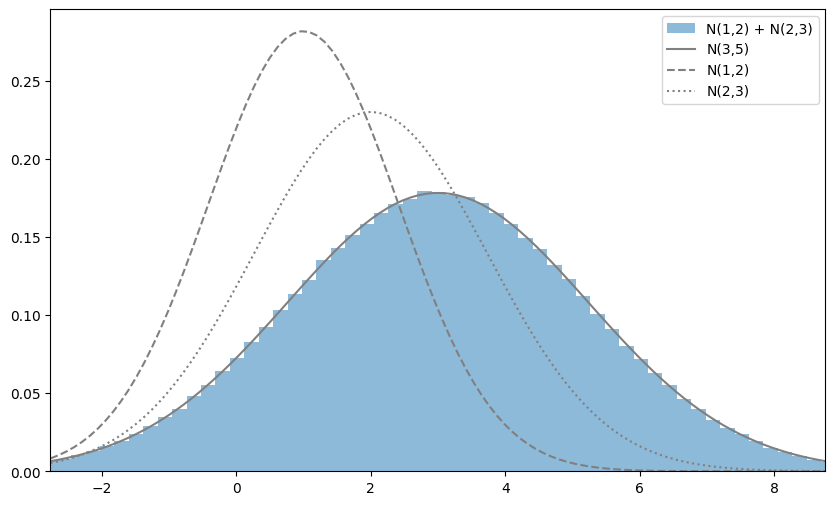

In [11]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

rv=stats.norm(3,np.sqrt(5))
xs=np.linspace(rv.isf(0.995),rv.isf(0.005),100)

ax.hist(sum_sample,bins=100,density=True,alpha=0.5,label="N(1,2) + N(2,3)")
ax.plot(xs,rv.pdf(xs),label="N(3,5)",color="gray")
ax.plot(xs,rv1.pdf(xs),label="N(1,2)",ls="--",color="gray")
ax.plot(xs,rv2.pdf(xs),label="N(2,3)",ls=":",color="gray")

ax.legend()
ax.set_xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()

In [15]:
rv1=stats.poisson(3)
rv2=stats.poisson(4)

sample_size=int(1e6)
X_sample=rv1.rvs(sample_size)
Y_sample=rv2.rvs(sample_size)
sum_sample=X_sample+Y_sample

print("{:.3f}, {:.3f}".format(np.mean(sum_sample),np.var(sum_sample)))

7.002, 7.003


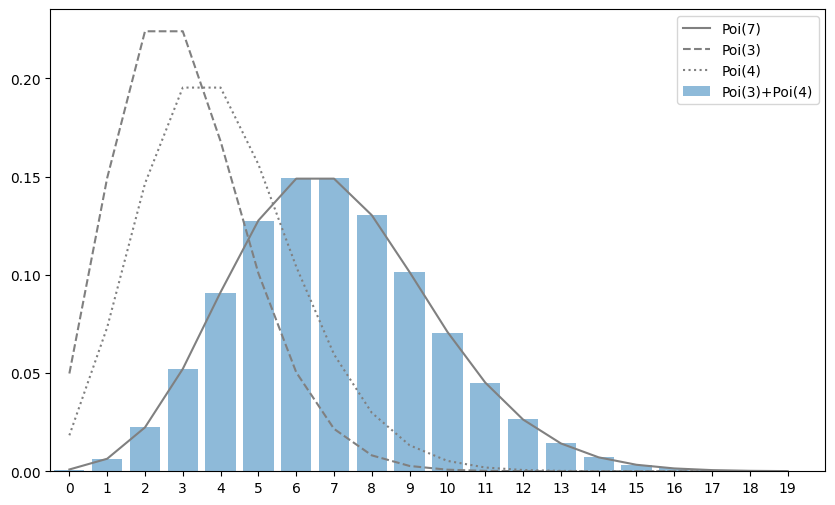

In [20]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

rv=stats.poisson(7)
xs=np.arange(20)
hist,_=np.histogram(sum_sample,bins=20,range=(0,20),density=True)

ax.bar(xs,hist,alpha=0.5,label="Poi(3)+Poi(4)")
ax.plot(xs,rv.pmf(xs),label="Poi(7)",color="gray")
ax.plot(xs,rv1.pmf(xs),label="Poi(3)",ls="--",color="gray")
ax.plot(xs,rv2.pmf(xs),label="Poi(4)",ls=":",color="gray")

ax.legend()
ax.set_xlim(-0.5,20)
ax.set_xticks(np.arange(20))
plt.show()

In [22]:
p=0.3
rv=stats.bernoulli(p)

sample_size=int(1e6)
Xs_sample=rv.rvs((10,sample_size))
sum_sample=np.sum(Xs_sample,axis=0)

print("{:.3f}, {:.3f}".format(np.mean(sum_sample),np.var(sum_sample)))

3.001, 2.101


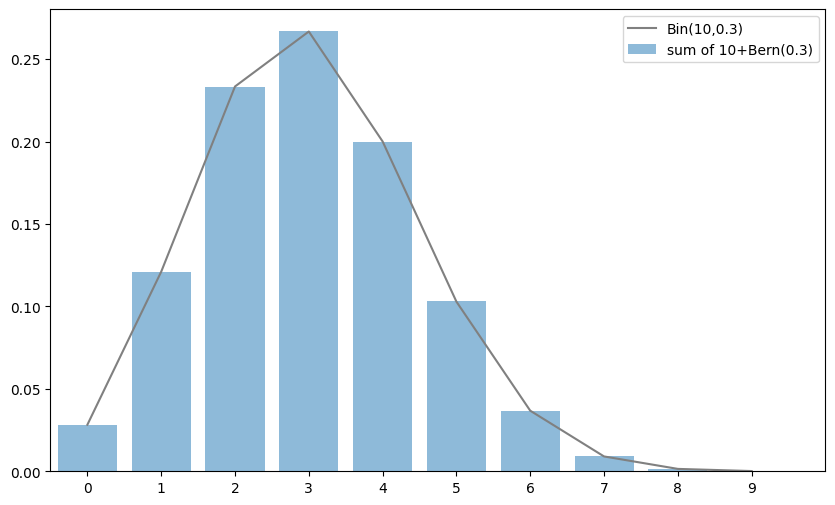

In [24]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

rv=stats.binom(10,p)
xs=np.arange(10)
hist,_=np.histogram(sum_sample,bins=10,range=(0,10),density=True)
ax.bar(xs,hist,alpha=0.5,label="sum of 10+Bern(0.3)")
ax.plot(xs,rv.pmf(xs),label="Bin(10,0.3)",color="gray")
ax.legend()
ax.set_xlim(-0.5,10)
ax.set_xticks(np.arange(10))
plt.show()

In [25]:
mean=1
var=2
rv=stats.norm(mean,np.sqrt(var))

n=10
sample_size=int(1e6)
Xs_sample=rv.rvs((n,sample_size))
sample_mean=np.mean(Xs_sample,axis=0)

print("{:.3f}, {:.3f}".format(np.mean(sample_mean),np.var(sample_mean)))

1.000, 0.200


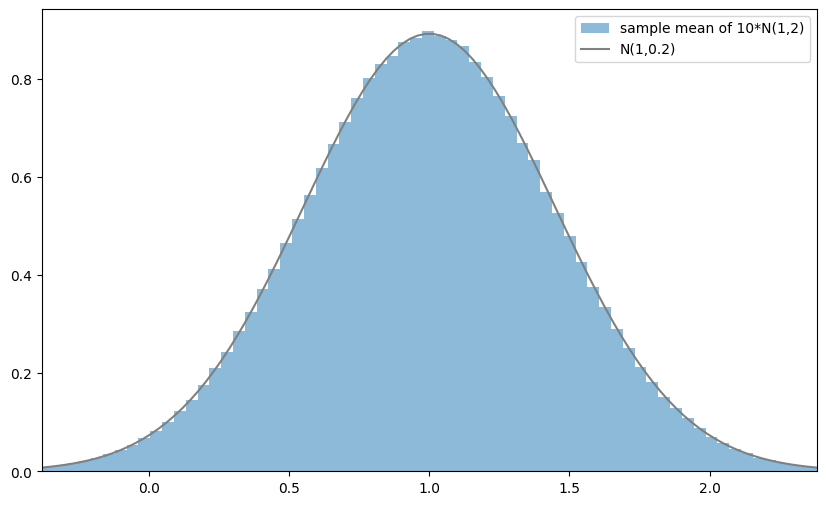

In [26]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

rv_true=stats.norm(mean,np.sqrt(var/n))
xs=np.linspace(rv_true.isf(0.999),rv_true.isf(0.001),100)
ax.hist(sample_mean,bins=100,density=True,alpha=0.5,label="sample mean of 10*N(1,2)")
ax.plot(xs,rv_true.pdf(xs),label="N(1,0.2)",color="gray")

ax.legend()
ax.set_xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

In [27]:
l=3
rv=stats.poisson(l)

n=10
sample_size=int(1e6)
Xs_sample=rv.rvs((n,sample_size))
sample_mean=np.mean(Xs_sample,axis=0)

print("{:.3f}, {:.3f}".format(np.mean(sample_mean),np.var(sample_mean)))

3.000, 0.300


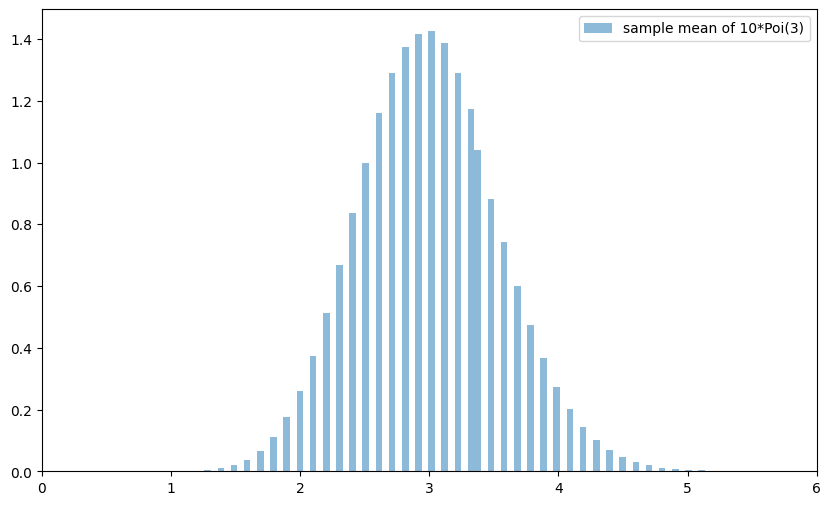

In [28]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.hist(sample_mean,bins=100,density=True,alpha=0.5,label="sample mean of 10*Poi(3)")

ax.legend()
ax.set_xlim(0,6)
plt.show()

In [29]:
l=3
rv=stats.poisson(l)

n=10000
sample_size=n
Xs_sample=rv.rvs((n,sample_size))
sample_mean=np.mean(Xs_sample,axis=0)

rv_true=stats.norm(l,np.sqrt(1/n))
xs=np.linspace(rv_true.isf(0.999),rv_true.isf(0.001),100)

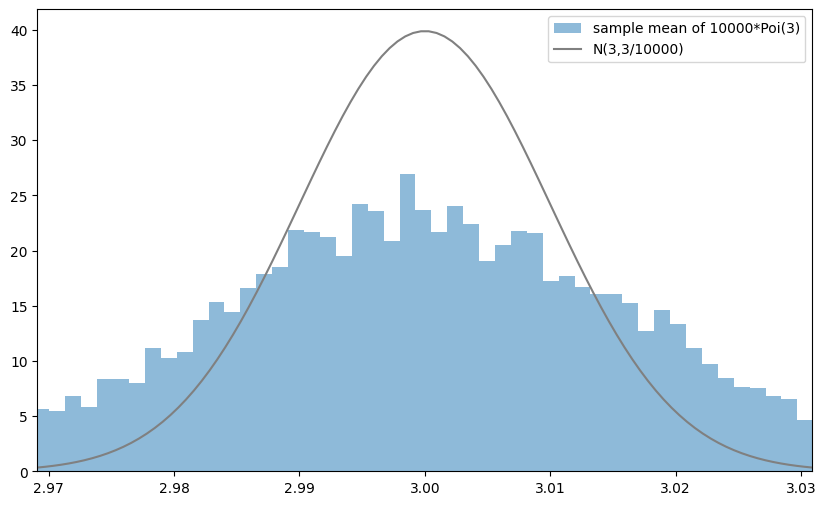

In [30]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.hist(sample_mean,bins=100,density=True,alpha=0.5,label=f"sample mean of {n}*Poi(3)")
ax.plot(xs,rv_true.pdf(xs),label="N(3,3/10000)",color="gray")

ax.legend()
ax.set_xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

In [31]:
p=1/6
rv=stats.bernoulli(p)

n=int(1e5)
sample=rv.rvs((n,4))
space=np.linspace(100,n,50).astype(int)
plot_list=np.array([np.mean(sample[:sp],axis=0) for sp in space]).T

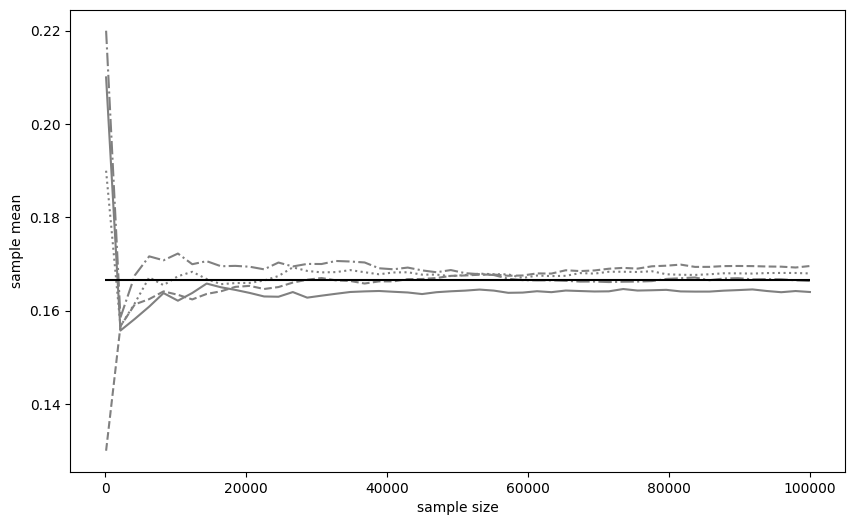

In [33]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

for pl, ls in zip(plot_list,linestyles):
  ax.plot(space, pl, ls=ls, color="gray")
ax.hlines(p,-1,n,'k')
ax.set_xlabel("sample size")
ax.set_ylabel("sample mean")

plt.show()